In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to change default colormap
plt.rcParams["image.cmap"] = "Accent"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Accent.colors)

## Read data

In [16]:
### read cumulative distinct kmers count files
ref_01 = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/output/ref_01.txt')
ref_03 = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/output/ref_03.txt')
ref_05 = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/output/ref_05.txt')
ref_08 = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/output/ref_08.txt')
ref_10 = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/output/ref_10.txt')
all_ecol = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/ecoli_cumul.txt')
shuffled_ecol = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/output/cumul_shuffled_ecoli.txt')

In [17]:
len(ref_01), ref_10[-1]

(891, 253330096.0)

In [18]:
len(all_ecol)

89136

In [19]:
### read compression sizes
cpr_reordered_sktch_10k = pd.read_csv('/Users/ktruong/workspace/Workspace/experiments/046_selection_strategy_percentage_for_single_species/csv/compression_results_standard.csv',header = None, names=['size_byte','path'])
cpr_reordered_sktch_01k = pd.read_csv('/Users/ktruong/workspace/Workspace/experiments/046_selection_strategy_percentage_for_single_species/csv/compression_results_2nd_reordered_1k.csv',header = None, names=['size_byte','path'])
cpr_no_reordered = pd.read_csv('/Users/ktruong/workspace/Workspace/experiments/046_selection_strategy_percentage_for_single_species/csv/compression_results_no_reordered.csv',header = None, names=['size_byte','path'])

In [20]:
cpr_reordered_sktch_10k[['path']].values[0][0][-19:-7]

'batch_01__00'

In [21]:
cpr_reordered_sktch_10k['path'] = [p[-19:-7] for p in cpr_reordered_sktch_10k['path']]

In [22]:
cpr_reordered_sktch_01k['path'] = [p[-19:-7] for p in cpr_reordered_sktch_01k['path']]
cpr_no_reordered['path'] = [p[-19:-7] for p in cpr_no_reordered['path']]

In [23]:
cpr_no_reordered['path']

0      batch_01__00
1      batch_01__01
2      batch_01__02
3      batch_01__03
4      batch_01__04
           ...     
110    batch_10__18
111    batch_10__19
112    batch_10__20
113    batch_10__21
114    batch_10__22
Name: path, Length: 115, dtype: object

In [24]:
cpr_no_reordered

,size_byte,path
0,162973792,batch_01__00
1,299349252,batch_01__01
2,148578812,batch_01__02
3,174354648,batch_01__03
4,162738016,batch_01__04
...,...,...
110,113112456,batch_10__18
111,89793244,batch_10__19
112,78091336,batch_10__20
113,84795884,batch_10__21


## Runtime graph

In [25]:
### runtime
mash = [20, 88, 201, 445, 655]
attotree = [1,3,14,56,113]
assignment= [2237,2850,3720, 4558, 4903]
sketching_time=[1604] * 5
mash_dist = [233,721,1090,1732,2118]

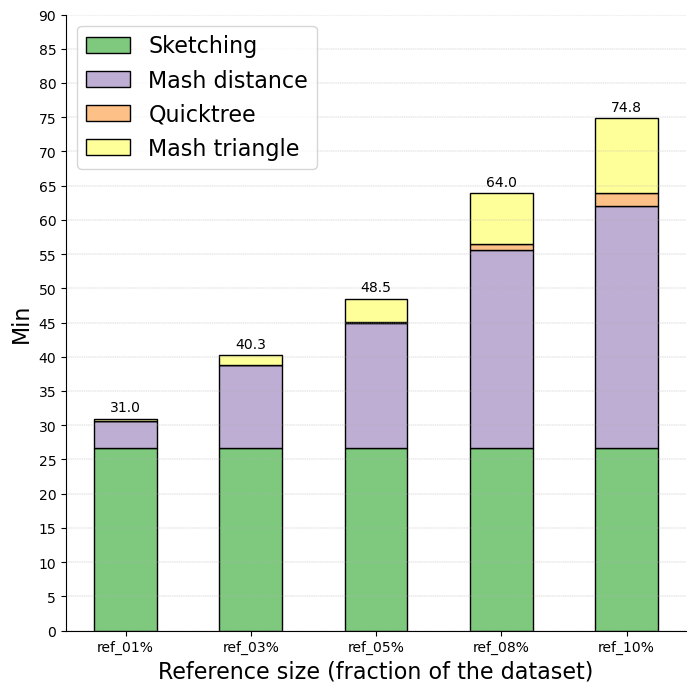

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

mash_min = [v/60 for v in mash]
attotree_min = [v/60 for v in attotree]
assignment_min = [v/60 for v in assignment]
sketching_time_min = [v/60 for v in sketching_time]
mash_dist_min = [v/60 for v in mash_dist]


names = ['ref_01%', 'ref_03%', 'ref_05%', 'ref_08%', 'ref_10%']
bottom = np.zeros(5)
width = 0.5

bar_0 = ax.bar(names, sketching_time_min,label='Sketching', bottom=bottom, edgecolor =  'black',width=width)
bottom = bottom + sketching_time_min

bar_1 = ax.bar(names, mash_dist_min,label='Mash distance', bottom=bottom, edgecolor =  'black',width=width)
bottom = bottom + mash_dist_min

bar_2 = ax.bar(names, attotree_min,label='Quicktree', bottom=bottom, edgecolor =  'black',width=width)
bottom = bottom + attotree_min

bar_3 = ax.bar(names, mash_min, label='Mash triangle', bottom=bottom, edgecolor =  'black',width=width)
ax.bar_label(bar_3, labels = [round((mash_min[i] + attotree_min[i]+sketching_time_min[i] +mash_dist_min[i]),1) for i in range(5)], padding = 3 )

ax.set_ylabel('Min',fontsize=16)
#ax.set_title('Preordering runtime',fontsize=18, fontweight='bold')
ax.set_xlabel('Reference size (fraction of the dataset)',fontsize=16)
ax.set_yticks(range(0,91,5))
ax.legend(loc="upper left", fontsize=16)
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show()

[Text(0, 0, '105.3'), Text(0, 0, '1.25')]

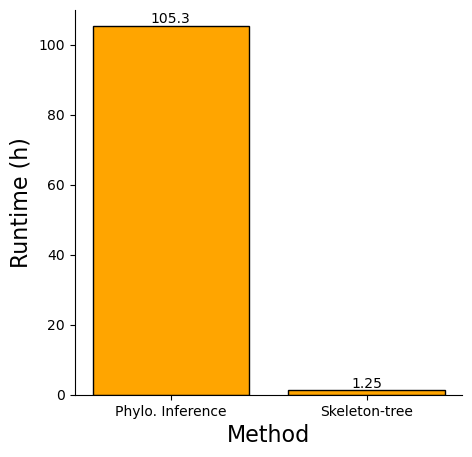

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
names = ['Phylo. Inference','Skeleton-tree']
counts = [105.3, 1.25]

bar_container = ax.bar(names, counts,color = 'orange', edgecolor = 'black')
ax.set(ylim=(0, 110))
ax.set_ylabel('Runtime (h)',fontsize=16)
#ax.set_title('Result: Compression Size Of 661k Collection',fontsize=18, fontweight='bold')
ax.set_xlabel('Method',fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.bar_label(bar_container)

## Distinct Kmers graph

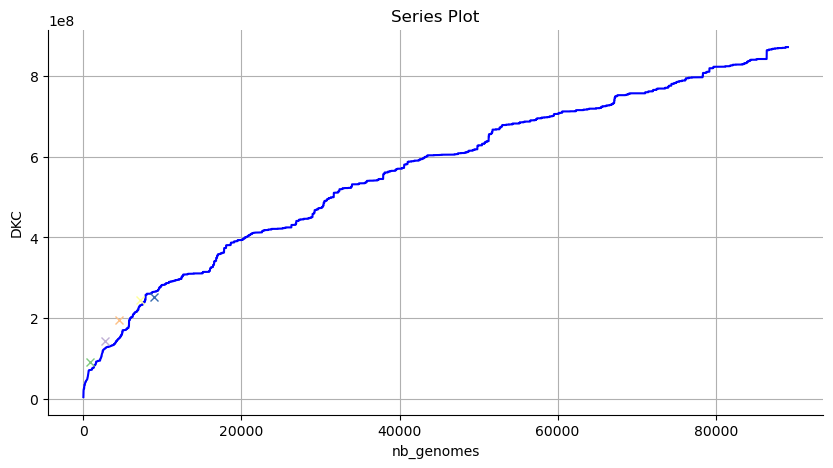

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(1, len(all_ecol) + 1)
y = all_ecol

# Plot
ax.plot(x, y,'-', color='blue')
ax.plot(len(ref_01), ref_01[-1], 'x', label = '01%')
ax.plot(len(ref_03), ref_03[-1], 'x', label = '03%')
ax.plot(len(ref_05), ref_05[-1], 'x', label = '05%')
ax.plot(len(ref_08), ref_08[-1], 'x', label = '08%')
ax.plot(len(ref_10), ref_10[-1], 'x', label = '10%')
plt.xlabel("nb_genomes")
plt.ylabel("DKC")
plt.title("Series Plot")
plt.grid(True)
plt.show()

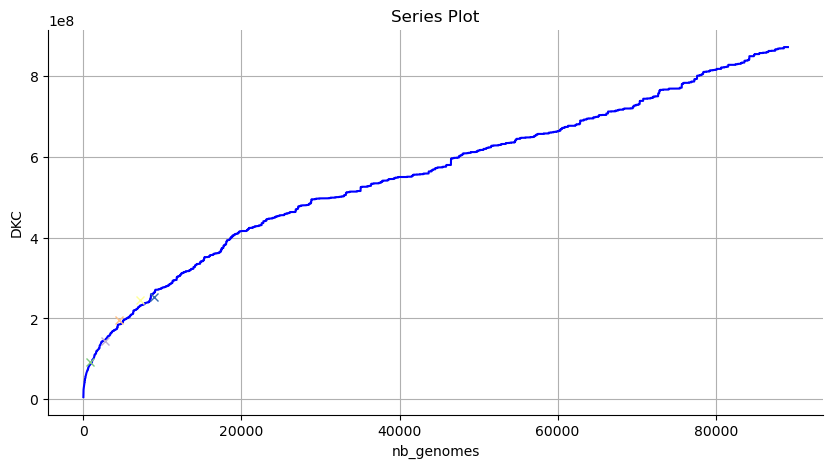

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(1, len(shuffled_ecol) + 1)
y = shuffled_ecol

# Plot
ax.plot(x, y,'-', color='blue')
ax.plot(len(ref_01), ref_01[-1], 'x', label = '01%')
ax.plot(len(ref_03), ref_03[-1], 'x', label = '03%')
ax.plot(len(ref_05), ref_05[-1], 'x', label = '05%')
ax.plot(len(ref_08), ref_08[-1], 'x', label = '08%')
ax.plot(len(ref_10), ref_10[-1], 'x', label = '10%')
plt.xlabel("nb_genomes")
plt.ylabel("DKC")
plt.title("Series Plot")
plt.grid(True)
plt.show()

In [55]:
genomes = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/input/shuffed_ecoli_cleaned.txt', dtype=str)

In [56]:
genomes

array(['SAMEA3981073', 'SAMN05770816', 'SAMN02368926', ...,
       'SAMN09914243', 'SAMN06846298', 'SAMN04263282'], dtype='<U14')

In [57]:
genomes[0]

'SAMEA3981073'

In [58]:
def absolute_change_aligned(x, y):
    y_prime = [0]  # or None, since there's no previous value for the first point
    for i in range(1, len(y)):
        dy = abs(y[i] - y[i - 1])
        y_prime.append(dy)
    return x, y_prime

In [59]:
x_new, y_change = absolute_change_aligned(x, y)

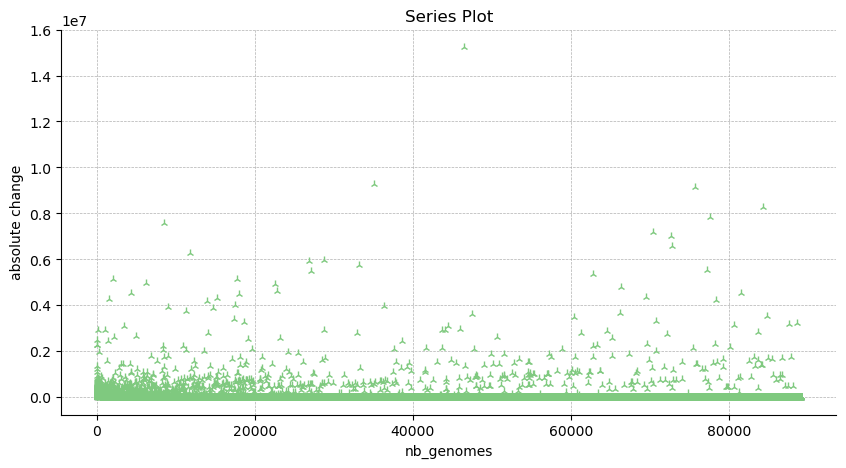

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.plot(x_new, y_change, '2',markersize=6)
plt.xlabel("nb_genomes")
plt.ylabel("absolute change")
plt.title("Series Plot")
plt.grid(True,linestyle='--', linewidth=0.5)
plt.show()

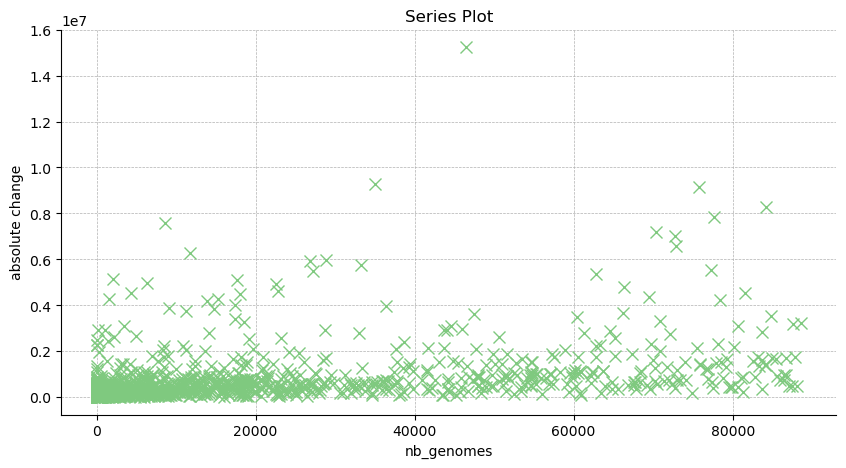

In [61]:
abs_change_pd = pd.DataFrame()
abs_change_pd['x'] = x_new
abs_change_pd['y'] = y_change
positive_changes = abs_change_pd[abs_change_pd['y']>0]

fig, ax = plt.subplots(figsize=(10, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.plot(positive_changes['x'], positive_changes['y'], 'x',markersize=8)
plt.xlabel("nb_genomes")
plt.ylabel("absolute change")
plt.title("Series Plot")
plt.grid(True,linestyle='--', linewidth=0.5)
plt.show()

In [62]:
y_change_np = np.array(y_change)
search_abs = np.where(y_change_np>0)

In [63]:
len(search_abs[0])

1336

In [64]:
search_abs[0]

array([    1,     2,     3, ..., 87857, 88094, 88610])

filename = './selection_tailored_shuffled.txt'
values = [genomes[i] for i in search_abs[0]]
with open(filename, "w") as f: 
    for value in values: 
        f.write(f"{value}\n")

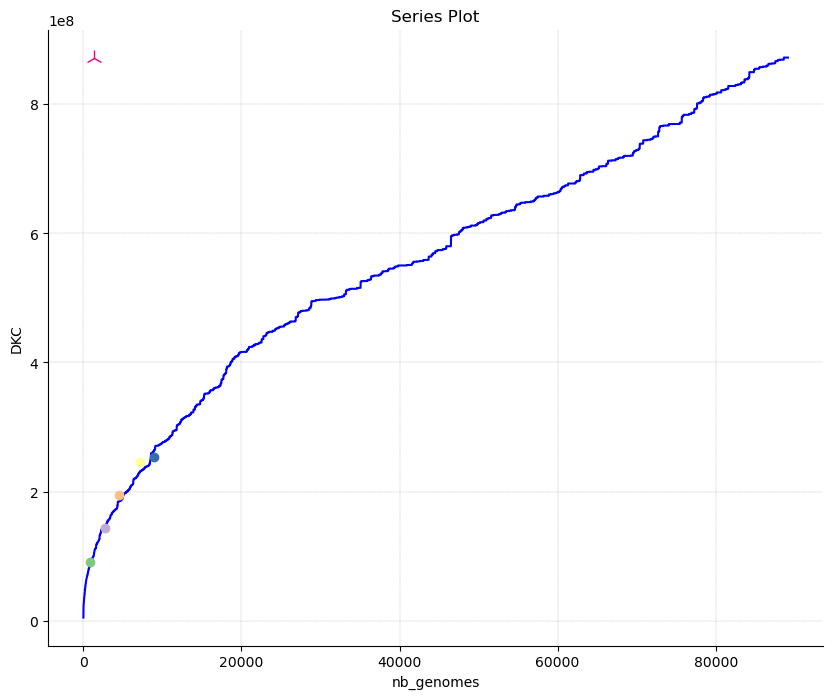

In [121]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(1, len(shuffled_ecol) + 1)
y = shuffled_ecol

# Plot
ax.plot(x, y,'-', color='blue')
ax.plot(len(ref_01), ref_01[-1], 'o', label = '01%')
ax.plot(len(ref_03), ref_03[-1], 'o', label = '03%')
ax.plot(len(ref_05), ref_05[-1], 'o', label = '05%')
ax.plot(len(ref_08), ref_08[-1], 'o', label = '08%')
ax.plot(len(ref_10), ref_10[-1], 'o', label = '10%')
ax.plot(1336, 872275072, '2', label = 'absolute_change', markersize=12)
plt.xlabel("nb_genomes")
plt.ylabel("DKC")
plt.title("Series Plot")
plt.grid(True,linestyle='--', linewidth=0.3)
plt.show()

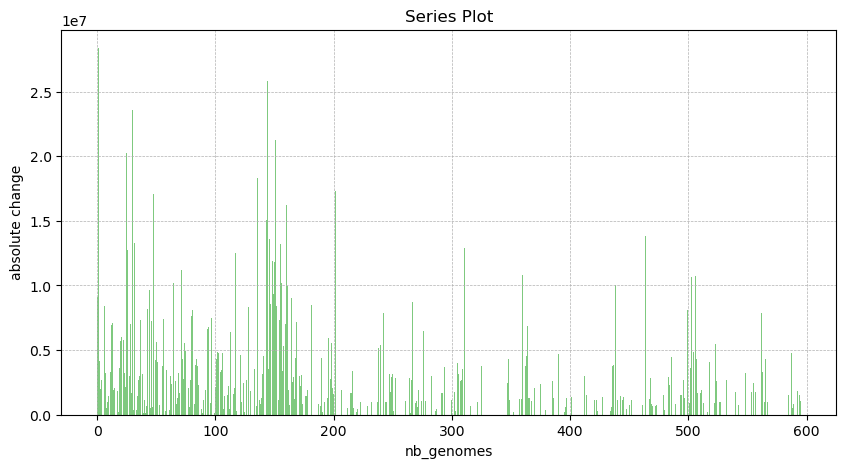

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))


def bucket_sum(values, bucket_size):
    buckets = [values[i:i+bucket_size] for i in range(0, len(values), bucket_size)]
    return [sum(bucket) for bucket in buckets]

buckets = bucket_sum(y_change, 300)

ax.bar(range(len(buckets)), buckets)

plt.xlabel("nb_genomes")
plt.ylabel("absolute change")
plt.title("Series Plot")
plt.grid(True,linestyle='--', linewidth=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

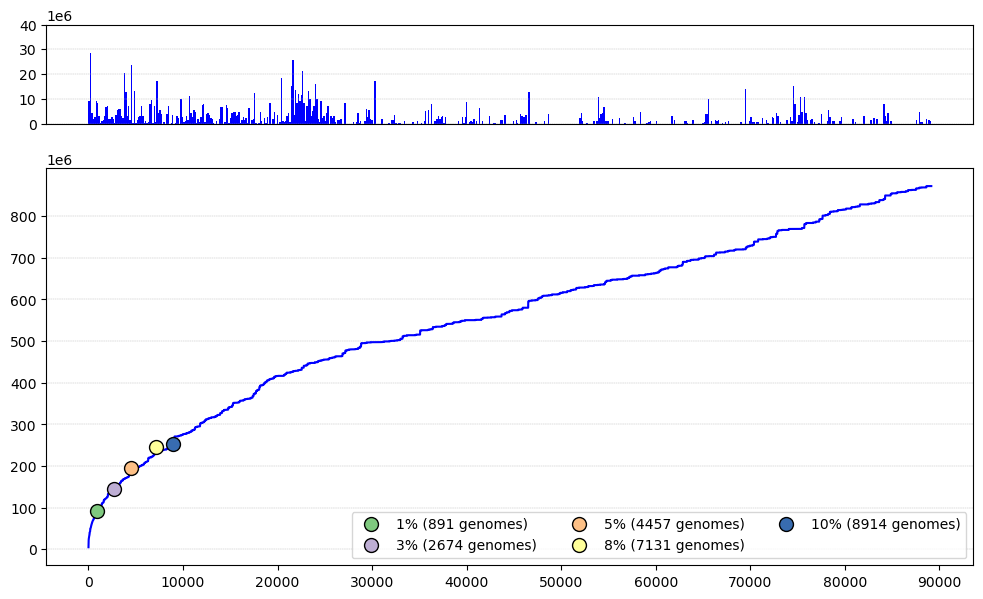

In [123]:
fig, axs = plt.subplots(2, sharex=False,figsize=(10, 6),gridspec_kw={'height_ratios': [1, 4]})
fig.tight_layout()

x = np.arange(0, len(shuffled_ecol))
y = [0] + shuffled_ecol

#axs[0].plot(x, y_change, '-', color='blue', linewidth=0.5)
axs[0].bar(np.arange(len(buckets))+0.5, buckets, width=1, color='blue')
axs[0].set_xticks([])
axs[0].set_yticks(np.arange(0,42000000,10000000))
axs[0].ticklabel_format(axis = 'y', scilimits = (6,6))

axs[1].plot(x, y, color='blue')

#axs[1].plot(len(ref_01), ref_01[-1], 'o', label = '1% (891 genomes)', mec = 'black', markersize = 10)
#axs[1].plot(len(ref_03), ref_03[-1], 'o', label = '3% (2674 genomes)' , mec = 'black', markersize = 10)
#axs[1].plot(len(ref_05), ref_05[-1], 'o', label = '5% (4457 genomes)', mec = 'black', markersize = 10)
#axs[1].plot(len(ref_08), ref_08[-1], 'o', label = '8% (7131 genomes)' , mec = 'black', markersize = 10)
#axs[1].plot(len(ref_10), ref_10[-1], 'o', label = '10% (8914 genomes)', mec = 'black', markersize = 10)
#axs[1].plot(1335, 872275072, 'o', label = 'Tailored selection (1135 genomes)', mec = 'black', markersize = 10, color='blue')

axs[1].plot(len(ref_01), ref_01[-1], 'o', label = '1% (891 genomes)', mec = 'black', markersize = 10)
axs[1].plot(len(ref_03), ref_03[-1], 'o', label = '3% (2674 genomes)' , mec = 'black', markersize = 10)
axs[1].plot(len(ref_05), ref_05[-1], 'o', label = '5% (4457 genomes)', mec = 'black', markersize = 10)
axs[1].plot(len(ref_08), ref_08[-1], 'o', label = '8% (7131 genomes)' , mec = 'black', markersize = 10)
axs[1].plot(len(ref_10), ref_10[-1], 'o', label = '10% (8914 genomes)', mec = 'black', markersize = 10)
#axs[1].plot(1335, 872275072, 'o', label = 'Tailored selection (1135 genomes)', mec = 'black', markersize = 10, color='blue')

axs[1].set_xticks(np.arange(0, 92500, 10000))
axs[1].set_yticks(np.arange(0,900000000,100000000))
axs[1].ticklabel_format(axis = 'y',scilimits = (6,6))
axs[1].legend(loc='lower right', ncols=3)

for ax in axs:
    ax.grid(True,linestyle='--', linewidth=0.3, which = 'both', axis = 'y')
    
plt.show

## Compression sizes graphs

In [124]:
cpr_reordered_sktch_10k['fraction'] = [p[:8] for p in cpr_reordered_sktch_10k['path']]
cpr_reordered_sktch_01k['fraction'] = [p[:8] for p in cpr_reordered_sktch_01k['path']]
cpr_no_reordered['fraction'] = [p[:8] for p in cpr_no_reordered['path']]

In [125]:
cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_01']

,size_byte,path,fraction
0,142677264,batch_01__00,batch_01
1,251283296,batch_01__01,batch_01
2,118854448,batch_01__02,batch_01
3,149480156,batch_01__03,batch_01
4,134085120,batch_01__04,batch_01
5,74913124,batch_01__05,batch_01
6,81093644,batch_01__06,batch_01
7,149577440,batch_01__07,batch_01
8,213319704,batch_01__08,batch_01
9,136745216,batch_01__09,batch_01


In [126]:
sum_cpr_size_01k = [
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_01'].sum()['size_byte'],
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_03'].sum()['size_byte'],
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_05'].sum()['size_byte'],
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_08'].sum()['size_byte'],
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_10'].sum()['size_byte']
]

sum_cpr_size_10k = [
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_01'].sum()['size_byte'],
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_03'].sum()['size_byte'],
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_05'].sum()['size_byte'],
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_08'].sum()['size_byte'],
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_10'].sum()['size_byte'],
]

sum_cpr_size_no_reordered = [
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_01'].sum()['size_byte'],
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_03'].sum()['size_byte'],
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_05'].sum()['size_byte'],
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_08'].sum()['size_byte'],
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_10'].sum()['size_byte'],
]

original = [4606402364]*5

In [127]:
sum_cpr_size_10k

[3094261844, 3059981920, 3053279092, 3049647152, 3043772372]

In [128]:
sum_cpr_size_no_reordered

[3721372664, 3405024180, 3303608052, 3228359840, 3189138964]

In [129]:
sum_cpr_size_01k

[3101215252, 3071773244, 3063496136, 3059064532, 3054219228]

<function matplotlib.pyplot.show(close=None, block=None)>

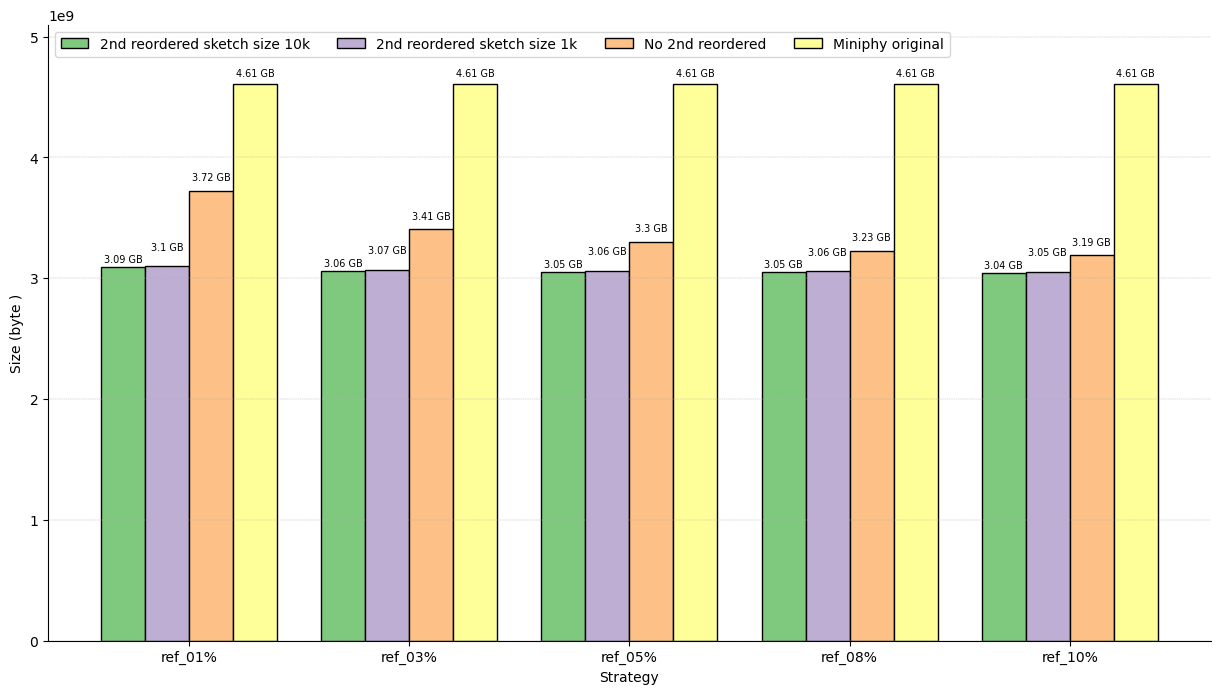

In [130]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

names = ['ref_01%', 'ref_03%', 'ref_05%', 'ref_08%', 'ref_10%']
x = np.arange(len(names)) 
width = 0.2
offset = width * 0
bar_1 = ax.bar(x+offset, sum_cpr_size_10k, label='2nd reordered sketch size 10k', edgecolor =  'black', width = width)
offset = width * 1
bar_2 = ax.bar(x+offset, sum_cpr_size_01k, label='2nd reordered sketch size 1k', edgecolor =  'black', width = width)
offset = width * 2
bar_3 = ax.bar(x+offset, sum_cpr_size_no_reordered, label='No 2nd reordered', edgecolor =  'black', width = width)
offset = width * 3
bar_4 = ax.bar(x+offset, original, label='Miniphy original', edgecolor =  'black', width = width)

ax.bar_label(bar_1, labels = [f'{round(v/1000000000,2)} GB' for v in sum_cpr_size_10k], fontsize = 7,padding = 2)
ax.bar_label(bar_2, labels = [f'{round(v/1000000000,2)} GB' for v in sum_cpr_size_01k], fontsize = 7, padding = 10)
ax.bar_label(bar_3, labels = [f'{round(v/1000000000,2)} GB' for v in sum_cpr_size_no_reordered], fontsize = 7,padding = 6)
ax.bar_label(bar_4, labels = [f'{round(v/1000000000,2)} GB' for v in original], fontsize = 7, padding = 4)

ax.set_xticks(x + 0.3, names)
ax.set_ylim(0,5100000000)

plt.xlabel("Strategy")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.legend(loc='upper left', ncols=4)
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

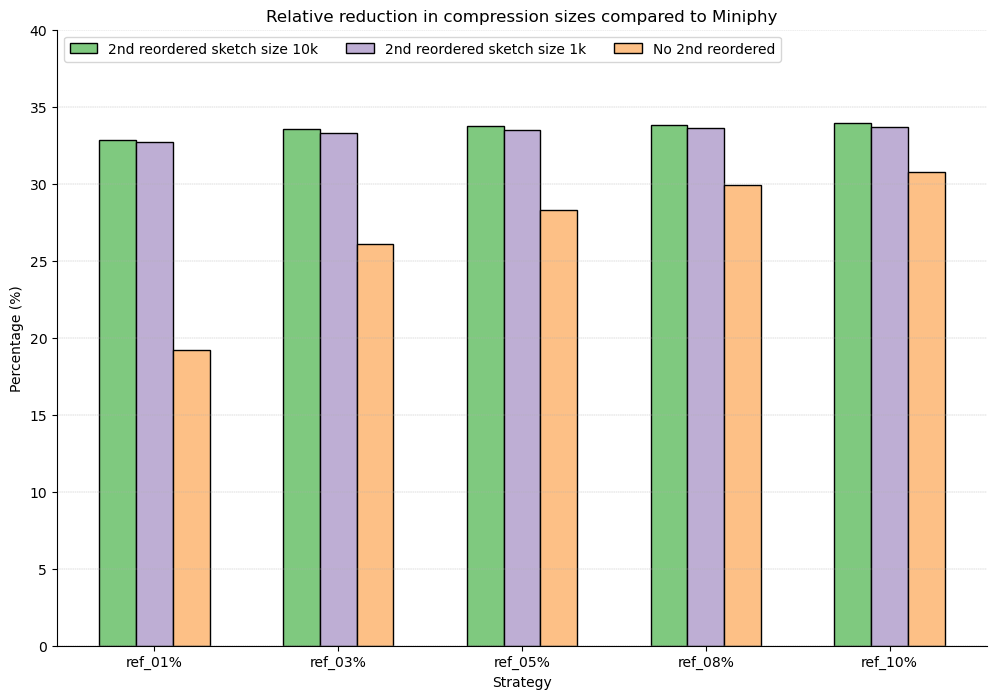

In [131]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(len(names)) 
width = 0.2
offset = width * 0
ax.bar(x+offset, [(b-a)*100/b for a,b in zip(sum_cpr_size_10k,original)], label='2nd reordered sketch size 10k', edgecolor =  'black', width = width)
#ax.plot(x+offset, [(b-a)*100/b for a,b in zip(sum_cpr_size_10k,original)], '-x', label='2nd reordered sketch size 10k')
offset = width * 1
ax.bar(x+offset, [(b-a)*100/b for a,b in zip(sum_cpr_size_01k,original)], label='2nd reordered sketch size 1k', edgecolor =  'black', width = width)
#ax.plot(x+offset, [(b-a)*100/b for a,b in zip(sum_cpr_size_01k,original)], '-x', label='2nd reordered sketch size 1k')
offset = width * 2
ax.bar(x+offset, [(b-a)*100/b for a,b in zip(sum_cpr_size_no_reordered,original)], label='No 2nd reordered', edgecolor =  'black', width = width)
#ax.plot(x+offset, [(b-a)*100/b for a,b in zip(sum_cpr_size_no_reordered,original)], '-x', label='No 2nd reordered')

ax.set_xticks(x + 0.2, names)
ax.set_ylim(0,40)

plt.xlabel("Strategy")
plt.ylabel("Percentage (%)")
plt.title("Relative reduction in compression sizes compared to Miniphy")
ax.legend(loc='upper left', ncols=3)
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

## salmonella enterica

In [132]:
all_senter = np.loadtxt('/Users/ktruong/workspace/Workspace/experiments/051_skeleton_tree_distinct_kmers_counts/output/661k_salmonella_enterica_cumul.txt')

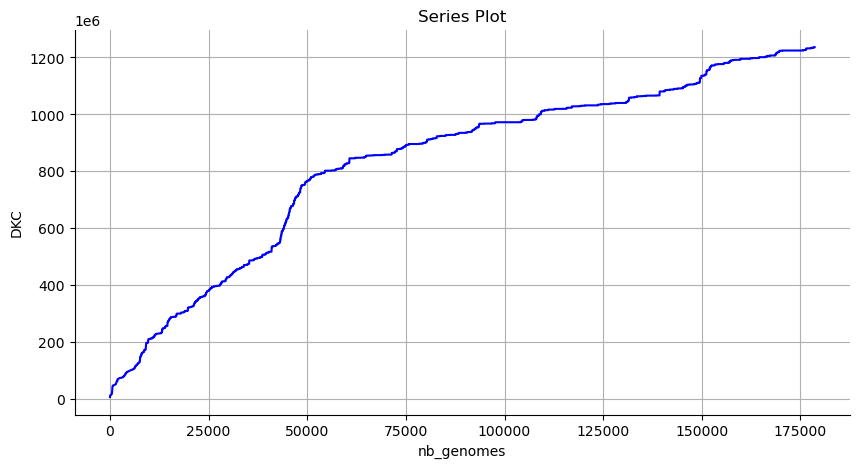

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(1, len(all_senter) + 1)
y = all_senter

# Plot
ax.plot(x, y,'-', color='blue')
ax.ticklabel_format(axis = 'y',scilimits = (6,6))
plt.xlabel("nb_genomes")
plt.ylabel("DKC")
plt.title("Series Plot")
plt.grid(True)
plt.show()

In [134]:
x_new, y_change = absolute_change_aligned(x, y)

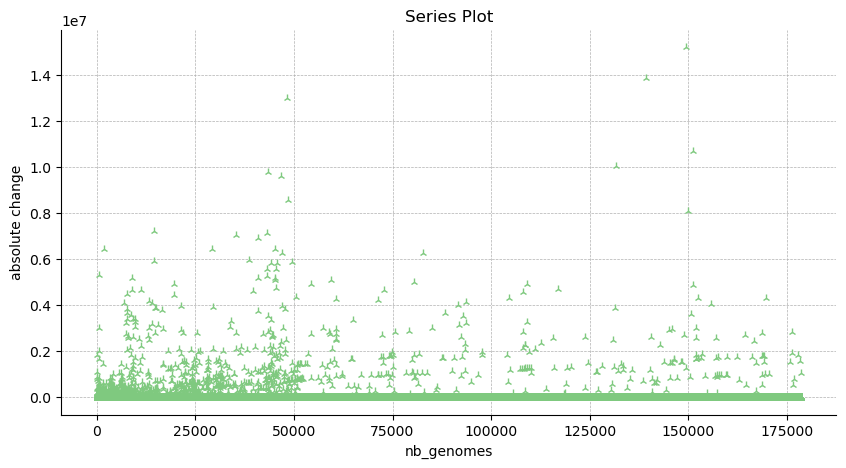

In [135]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.plot(x_new, y_change, '2',markersize=6)
plt.xlabel("nb_genomes")
plt.ylabel("absolute change")
plt.title("Series Plot")
plt.grid(True,linestyle='--', linewidth=0.5)
plt.show()

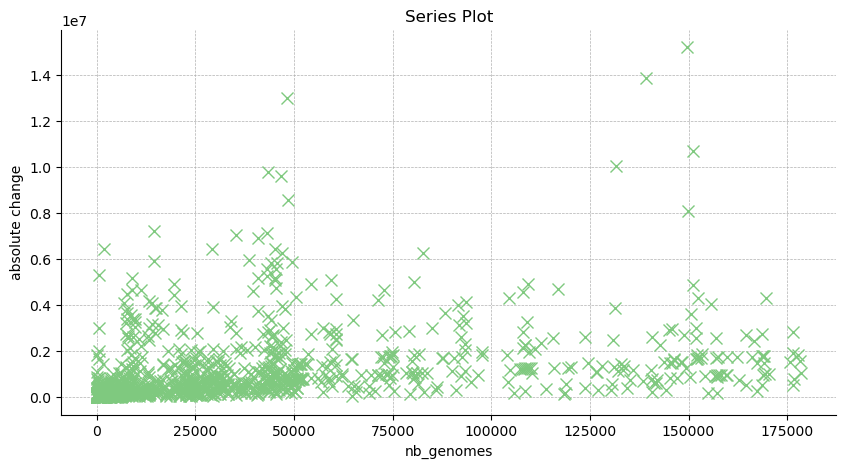

In [136]:
abs_change_pd = pd.DataFrame()
abs_change_pd['x'] = x_new
abs_change_pd['y'] = y_change
positive_changes = abs_change_pd[abs_change_pd['y']>0]

fig, ax = plt.subplots(figsize=(10, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.plot(positive_changes['x'], positive_changes['y'], 'x',markersize=8)
plt.xlabel("nb_genomes")
plt.ylabel("absolute change")
plt.title("Series Plot")
plt.grid(True,linestyle='--', linewidth=0.5)
plt.show()

In [137]:
positive_changes

,x,y
1,2,1829430.5
2,3,182861.0
4,5,2649.5
6,7,16942.0
7,8,9342.0
...,...,...
176413,176414,530432.0
176763,176764,803200.0
177734,177735,1848576.0
178272,178273,1549568.0


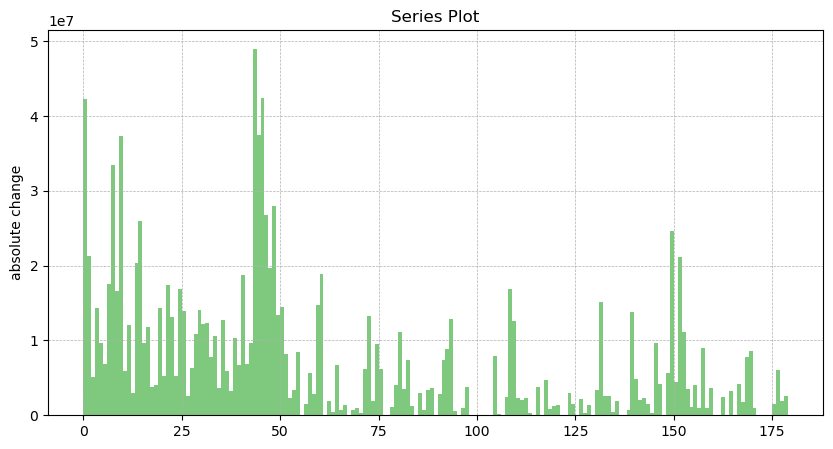

In [138]:
fig, ax = plt.subplots(figsize=(10, 5))

def bucket_sum(values, bucket_size):
    buckets = [values[i:i+bucket_size] for i in range(0, len(values), bucket_size)]
    return [sum(bucket) for bucket in buckets]

buckets = bucket_sum(y_change, 1000)

ax.bar(np.arange(len(buckets))+0.5, buckets,width=1)


plt.ylabel("absolute change")
plt.title("Series Plot")
plt.grid(True,linestyle='--', linewidth=0.5)
plt.show()

## Sal enterica ATB

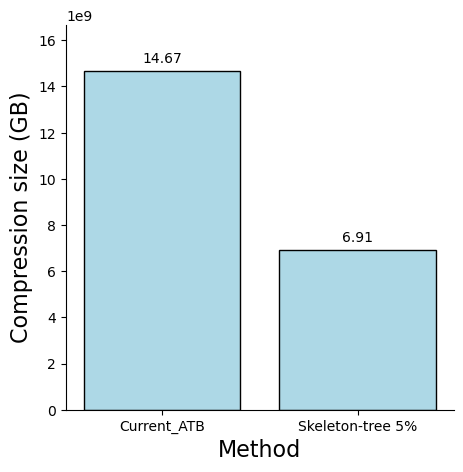

In [139]:
fig, ax = plt.subplots(figsize=(5, 5))
names = ['Current_ATB','Skeleton-tree 5%',]
counts = [14670418172, 6908108948]
incre_released = [2449371244, 0]
rel_02 = [12221046928,0]
rec_compressed = [0,6908108948]

bar_container = ax.bar(names, counts, edgecolor = 'black', color='lightblue')
ax.set(ylim=(0, 16670418172))
ax.set_ylabel('Compression size (GB)',fontsize=16)
#ax.set_title('Result: Compression Size Of 661k Collection',fontsize=18, fontweight='bold')
ax.set_xlabel('Method',fontsize=16)

ax.ticklabel_format(axis = 'y',scilimits = (9,9))
ax.bar_label(bar_container, labels=[14.67,6.91], padding = 4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

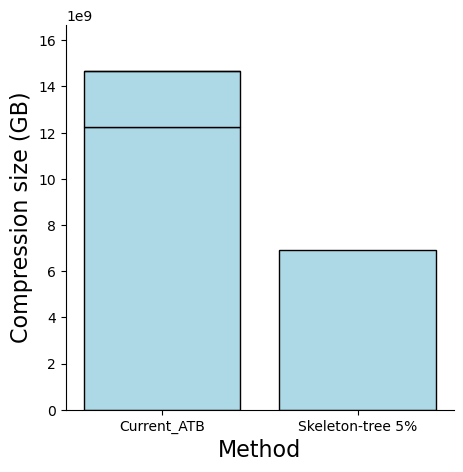

In [140]:
fig, ax = plt.subplots(figsize=(5, 5))
names = ['Current_ATB','Skeleton-tree 5%',]
counts = [14670418172, 6908108948]
incre_released = [2449371244, 0]
rel_02 = [12221046928,0]
rec_compressed = [0,6908108948]

data = [rel_02,incre_released,rec_compressed]

bottom = np.zeros(2)

for d in data:
    p = ax.bar(names, d, bottom=bottom, edgecolor = 'black', color='lightblue')
    bottom += d

ax.set(ylim=(0, 16670418172))
ax.set_ylabel('Compression size (GB)',fontsize=16)
#ax.set_title('Result: Compression Size Of 661k Collection',fontsize=18, fontweight='bold')
ax.set_xlabel('Method',fontsize=16)

ax.ticklabel_format(axis = 'y',scilimits = (9,9))
#ax.bar_label(p, labels=[14.67,6.91], padding = 4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [141]:
### runtime
mash = 7198/3600
quicktree=8343/3600
placement = (116864 + 3852)/3600
post_processing = 3852

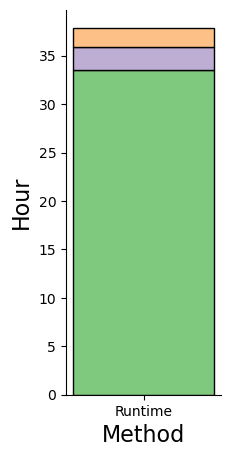

In [142]:
fig, ax = plt.subplots(figsize=(2, 5))
names = ['Runtime']

bottom=0

ax.bar(names, placement,bottom=bottom, edgecolor = 'black')
bottom += placement

ax.bar(names, quicktree,bottom=bottom, edgecolor = 'black')
bottom = bottom + quicktree

ax.bar(names, mash,bottom=bottom, edgecolor = 'black')
bottom = bottom + mash

#ax.set(ylim=(0, 3.5))
ax.set_ylabel('Hour',fontsize=16)
#ax.set_title('Result: Compression Size Of 661k Collection',fontsize=18, fontweight='bold')
ax.set_xlabel('Method',fontsize=16)

ax.ticklabel_format(axis = 'y')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [143]:
mash+quicktree+placement

37.84916666666667

In [144]:
mash,quicktree,placement

(1.9994444444444444, 2.3175, 33.532222222222224)

## tailored selection

In [145]:
sum_cpr_size_01k = [
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_01'].sum()['size_byte'],
    3074663428,
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_03'].sum()['size_byte'],
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_05'].sum()['size_byte'],
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_08'].sum()['size_byte'],
    cpr_reordered_sktch_01k[cpr_reordered_sktch_01k['fraction']=='batch_10'].sum()['size_byte']
]

sum_cpr_size_10k = [
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_01'].sum()['size_byte'],
    3064295112,
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_03'].sum()['size_byte'],
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_05'].sum()['size_byte'],
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_08'].sum()['size_byte'],
    cpr_reordered_sktch_10k[cpr_reordered_sktch_10k['fraction']=='batch_10'].sum()['size_byte'],
]

sum_cpr_size_no_reordered = [
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_01'].sum()['size_byte'],
    3579989068,
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_03'].sum()['size_byte'],
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_05'].sum()['size_byte'],
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_08'].sum()['size_byte'],
    cpr_no_reordered[cpr_no_reordered['fraction']=='batch_10'].sum()['size_byte'],
]

original = [4606402364]*6

In [146]:
sum_cpr_size_10k

[3094261844, 3064295112, 3059981920, 3053279092, 3049647152, 3043772372]

<function matplotlib.pyplot.show(close=None, block=None)>

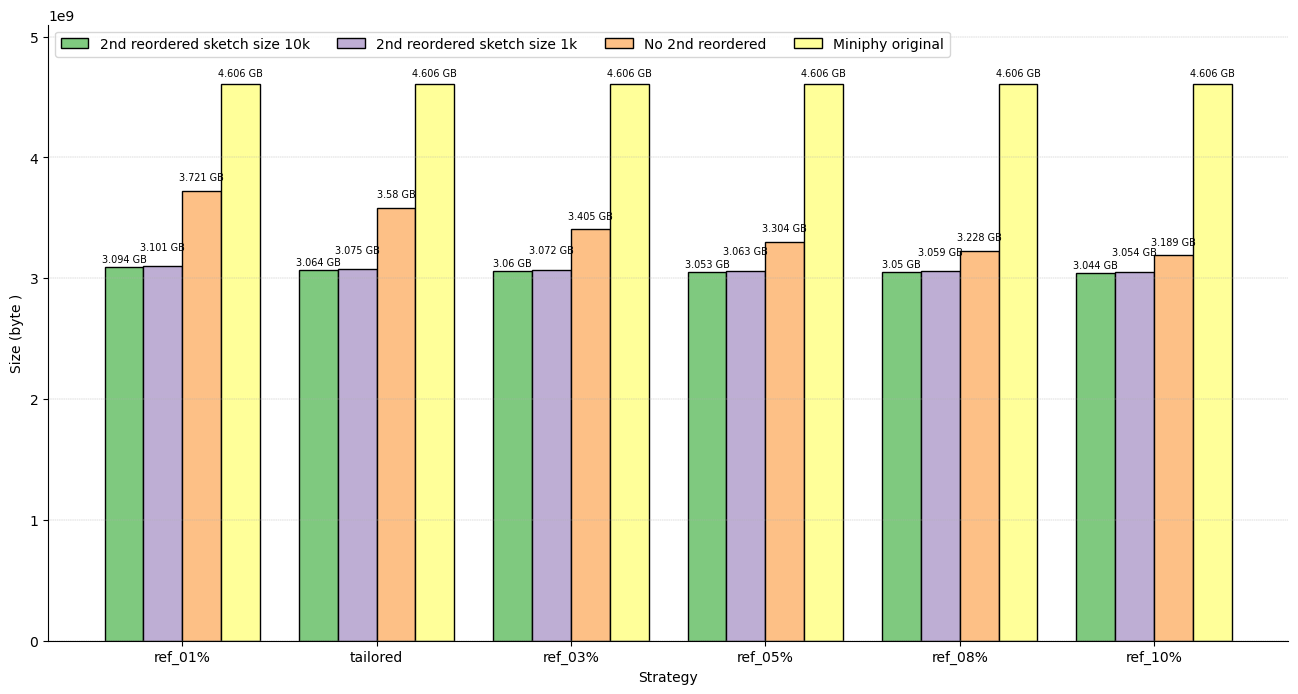

In [147]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

names = ['ref_01%','tailored', 'ref_03%', 'ref_05%', 'ref_08%', 'ref_10%']
x = np.arange(len(names)) 
width = 0.2
offset = width * 0
bar_1 = ax.bar(x+offset, sum_cpr_size_10k, label='2nd reordered sketch size 10k', edgecolor =  'black', width = width)
offset = width * 1
bar_2 = ax.bar(x+offset, sum_cpr_size_01k, label='2nd reordered sketch size 1k', edgecolor =  'black', width = width)
offset = width * 2
bar_3 = ax.bar(x+offset, sum_cpr_size_no_reordered, label='No 2nd reordered', edgecolor =  'black', width = width)
offset = width * 3
bar_4 = ax.bar(x+offset, original, label='Miniphy original', edgecolor =  'black', width = width)

ax.bar_label(bar_1, labels = [f'{round(v/1000000000,3)} GB' for v in sum_cpr_size_10k], fontsize = 7,padding = 2)
ax.bar_label(bar_2, labels = [f'{round(v/1000000000,3)} GB' for v in sum_cpr_size_01k], fontsize = 7, padding = 10)
ax.bar_label(bar_3, labels = [f'{round(v/1000000000,3)} GB' for v in sum_cpr_size_no_reordered], fontsize = 7,padding = 6)
ax.bar_label(bar_4, labels = [f'{round(v/1000000000,3)} GB' for v in original], fontsize = 7, padding = 4)

ax.set_xticks(x + 0.3, names)
ax.set_ylim(0,5100000000)

plt.xlabel("Strategy")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.legend(loc='upper left', ncols=4)
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

In [218]:
original = [44527255812, 17403572844]
skeleton = [25621005804, 10129920836]

<function matplotlib.pyplot.show(close=None, block=None)>

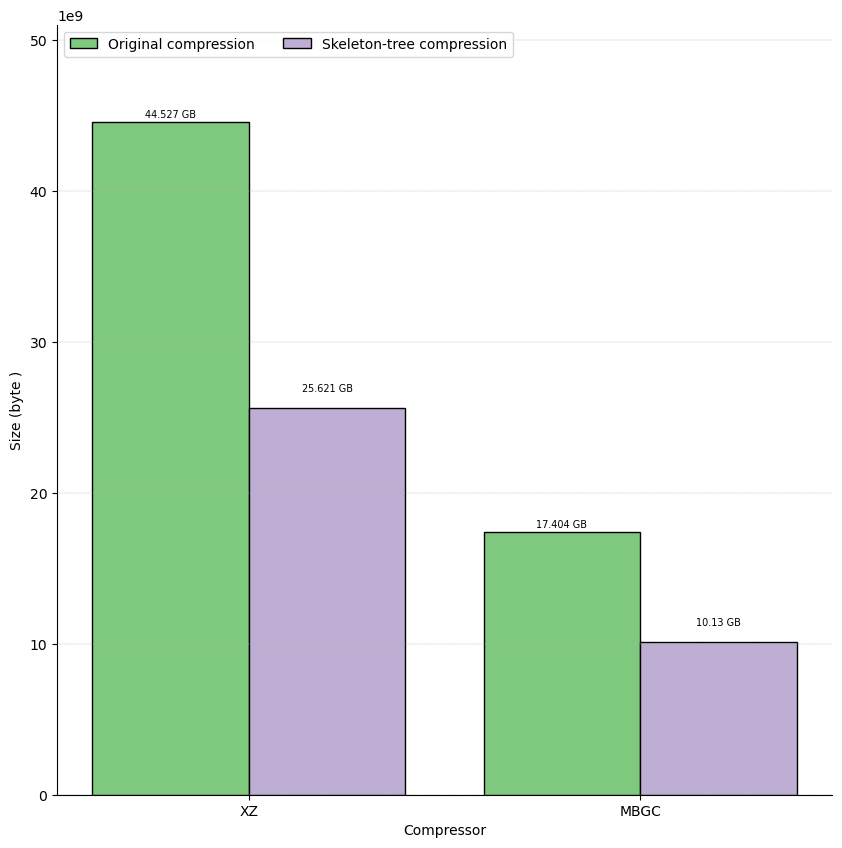

In [219]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

names = ['XZ','MBGC']
x = np.arange(len(names)) 
width = 0.4
offset = width * 0
bar_1 = ax.bar(x+offset, original, label='Original compression', edgecolor =  'black', width = width)
offset = width * 1
bar_2 = ax.bar(x+offset, skeleton, label='Skeleton-tree compression', edgecolor =  'black', width = width)
offset = width * 2

ax.bar_label(bar_1, labels = [f'{round(v/1000000000,3)} GB' for v in original], fontsize = 7,padding = 2)
ax.bar_label(bar_2, labels = [f'{round(v/1000000000,3)} GB' for v in skeleton], fontsize = 7, padding = 10)

ax.set_xticks(x + 0.2, names)
ax.set_ylim(0,51000000000)

plt.xlabel("Compressor")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.legend(loc='upper left', ncols=4)
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

In [158]:
original_xz = [20485528372,3316290692,2039615704,1740253296,14670418172,1020551864,1254597712]
original_mbgc = [6732999058,983290675,1501877754,623137838,6350812017,550083756,661371746]
skeleton_xz = [ 11693951220, 2241684500, 1973866704, 1232124408, 6908108948, 745244564, 826025460]
skeleton_mgbc = [3938928930,634721136,1363386295,415005276,2901918761,412809974,463150464]
names = ['E.coli', 'K.pneumoniae', 'M.tuberculosis', 'P.aeruginosa', 'S.enterica', 'S.aureus', 'S.pneumoniae']

In [215]:
original_xz = [20485528372,14670418172,3316290692,2039615704,1740253296,1254597712,1020551864]
original_mbgc = [6732999058,6350812017,983290675,1501877754,623137838,661371746,550083756]
skeleton_xz = [ 11693951220, 6908108948, 2241684500, 1973866704, 1232124408, 826025460, 745244564]
skeleton_mgbc = [3938928930,2901918761,634721136,1363386295,415005276,463150464,412809974]
names = ['E.coli', 'S.enterica', 'K.pneumoniae', 'M.tuberculosis', 'P.aeruginosa', 'S.pneumoniae', 'S.aureus']

<function matplotlib.pyplot.show(close=None, block=None)>

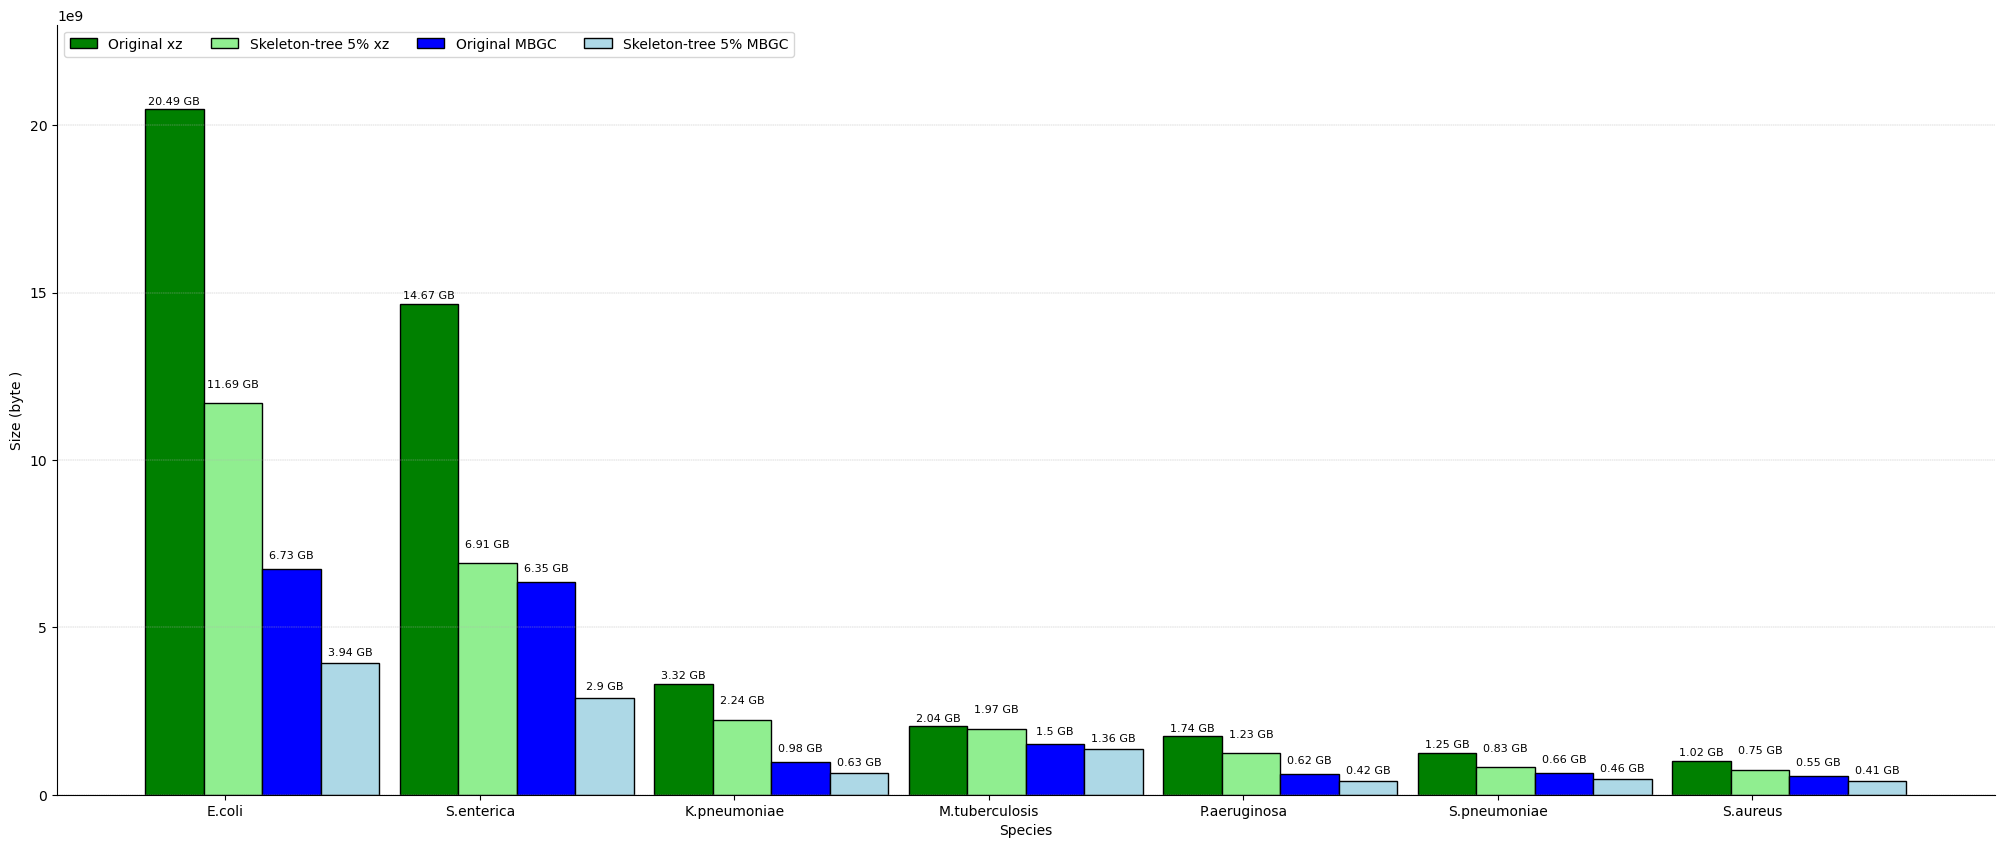

In [217]:
fig, ax = plt.subplots(figsize=(25, 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(len(names)) 
width = 0.23
offset = width * 0
bar_1 = ax.bar(x+offset, original_xz, label='Original xz', edgecolor =  'black', width = width, color = 'green')
offset = width * 1
bar_2 = ax.bar(x+offset, skeleton_xz, label='Skeleton-tree 5% xz', edgecolor =  'black', width = width, color = 'lightgreen')
offset = width * 2
bar_3 = ax.bar(x+offset, original_mbgc, label='Original MBGC', edgecolor =  'black', width = width, color='blue')
offset = width * 3
bar_4 = ax.bar(x+offset, skeleton_mgbc, label='Skeleton-tree 5% MBGC', edgecolor =  'black', width = width, color='lightblue')

ax.bar_label(bar_1, labels = [f'{round(v/1000000000,2)} GB' for v in original_xz], fontsize = 8,padding = 2)
ax.bar_label(bar_2, labels = [f'{round(v/1000000000,2)} GB' for v in skeleton_xz], fontsize = 8, padding = 10)
ax.bar_label(bar_3, labels = [f'{round(v/1000000000,2)} GB' for v in original_mbgc], fontsize = 8,padding = 6)
ax.bar_label(bar_4, labels = [f'{round(v/1000000000,2)} GB' for v in skeleton_mgbc], fontsize = 8, padding = 4)

ax.set_xticks(x + 0.2, names)
ax.set_ylim(0,23000000000)

plt.xlabel("Species")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.legend(loc='upper left', ncols=4)
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

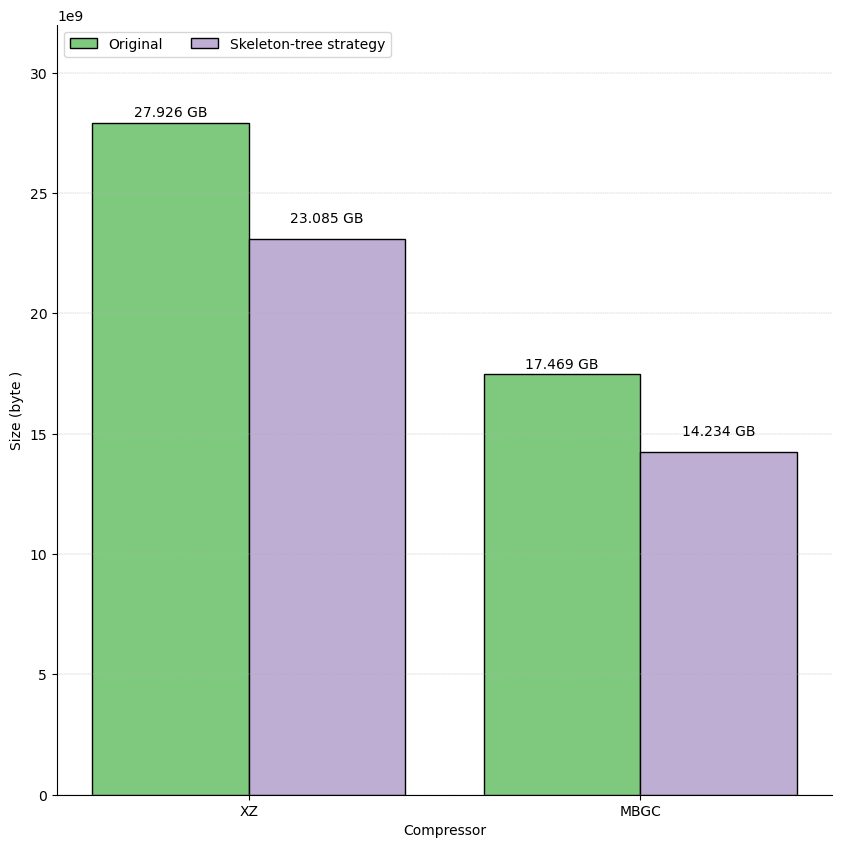

In [225]:
original = [27926192405, 17468621247]
skeleton = [23084674072, 14234094474]

fig, ax = plt.subplots(figsize=(10, 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

names = ['XZ','MBGC']
x = np.arange(len(names)) 
width = 0.4
offset = width * 0
bar_1 = ax.bar(x+offset, original, label='Original', edgecolor =  'black', width = width)
offset = width * 1
bar_2 = ax.bar(x+offset, skeleton, label='Skeleton-tree strategy', edgecolor =  'black', width = width)
offset = width * 2

ax.bar_label(bar_1, labels = [f'{round(v/1000000000,3)} GB' for v in original], fontsize = 10,padding = 2)
ax.bar_label(bar_2, labels = [f'{round(v/1000000000,3)} GB' for v in skeleton], fontsize = 10, padding = 10)

ax.set_xticks(x + 0.2, names)
ax.set_ylim(0,32000000000)

plt.xlabel("Compressor")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.legend(loc='upper left', ncols=4)
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

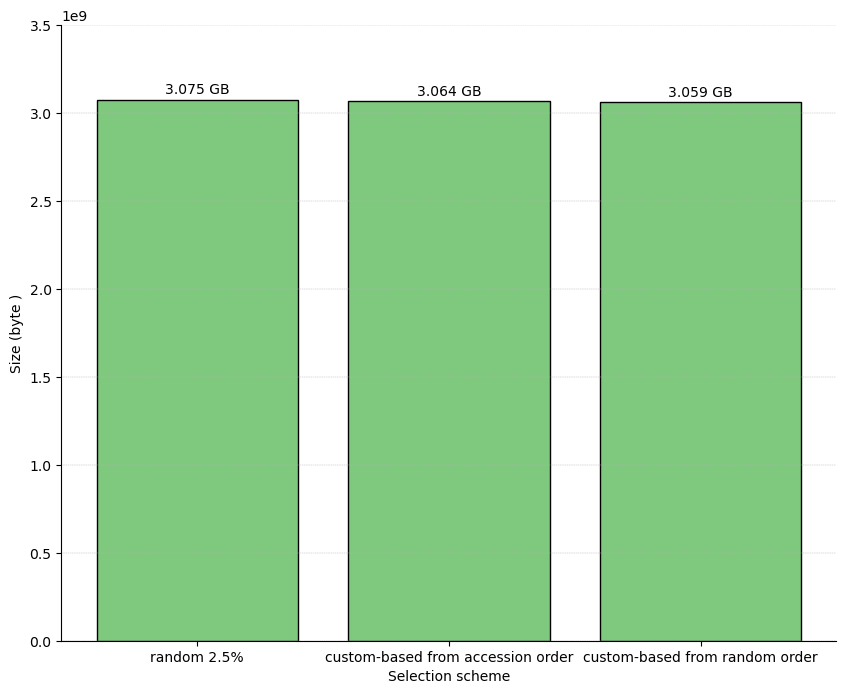

In [211]:
data = [3074990600, 3064295112, 3059124184]
names = ['random 2.5%', 'custom-based from accession order', 'custom-based from random order']

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(len(names)) 

bar_1 = ax.bar(x, data, edgecolor =  'black', width = 0.8)
ax.bar_label(bar_1, labels = [f'{round(v/1000000000,3)} GB' for v in data], fontsize = 10,padding = 2)
ax.set_xticks(x, names)
ax.set_ylim(0,3500000000)

plt.xlabel("Selection scheme")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

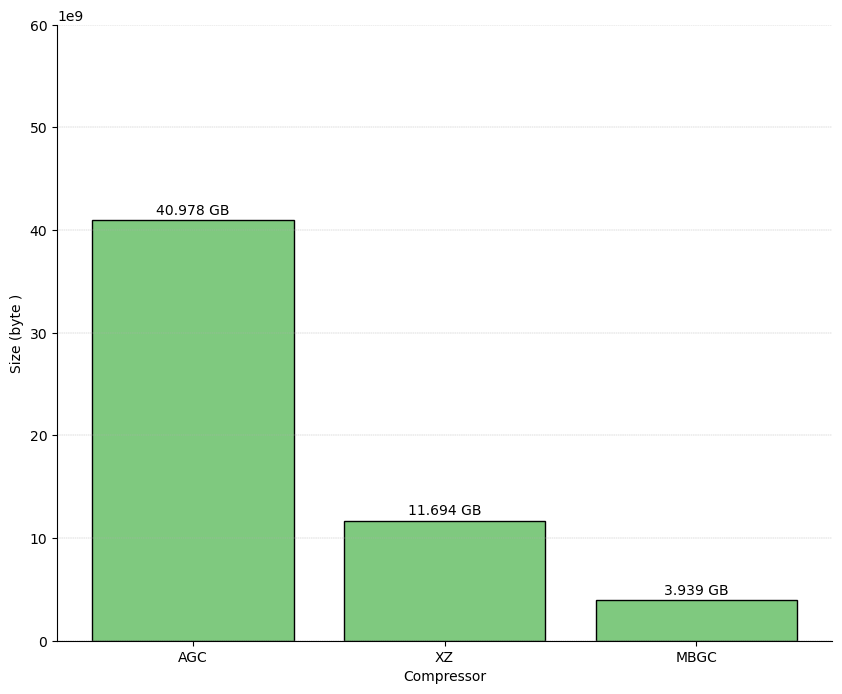

In [224]:
data = [40978077814, 11693951220, 3938928930]
names = ['AGC', 'XZ', 'MBGC']

fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

x = np.arange(len(names)) 

bar_1 = ax.bar(x, data, edgecolor =  'black', width = 0.8)
ax.bar_label(bar_1, labels = [f'{round(v/1000000000,3)} GB' for v in data], fontsize = 10,padding = 2)
ax.set_xticks(x, names)
ax.set_ylim(0,60000000000)

plt.xlabel("Compressor")
plt.ylabel("Size (byte )")
#plt.title("Compression sizes")
ax.ticklabel_format(axis = 'y',scilimits = (9,9))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show

In [228]:
data = """
batch_2,96850520
batch_3,96167128
batch_18,95625056
batch_1,98100856
batch_0,95796536
batch_19,95590120
batch_21,95624616
batch_4,95643312
batch_5,95678872
batch_20,96701072
batch_22,69769992
batch_7,95627864
batch_6,97468592
batch_12,95695600
batch_13,95790472
batch_11,95699960
batch_8,95581240
batch_9,95760832
batch_10,95883352
batch_14,95589656
batch_15,95593096
batch_17,95776328
batch_16,95629224
"""
cardinalities = []
names = []

for line in data.strip().splitlines():
    name, val = [x.strip() for x in line.split(",")]
    num = int(name.split("_")[1])
    cardinalities.append(int(val))
    names.append(f"batch {num:02d}")

print(cardinalities)
print(names)

[96850520, 96167128, 95625056, 98100856, 95796536, 95590120, 95624616, 95643312, 95678872, 96701072, 69769992, 95627864, 97468592, 95695600, 95790472, 95699960, 95581240, 95760832, 95883352, 95589656, 95593096, 95776328, 95629224]
['batch 02', 'batch 03', 'batch 18', 'batch 01', 'batch 00', 'batch 19', 'batch 21', 'batch 04', 'batch 05', 'batch 20', 'batch 22', 'batch 07', 'batch 06', 'batch 12', 'batch 13', 'batch 11', 'batch 08', 'batch 09', 'batch 10', 'batch 14', 'batch 15', 'batch 17', 'batch 16']


In [263]:
df_card = pd.DataFrame({
    "batch": names,
    "cardinality": cardinalities
}).set_index("batch")
index = ['_'.join(i.split(' ')) for i in df_card.index]
df_card.index = index
df_card = df_card.sort_values(by='cardinality', ascending = False)
df_card

,cardinality
batch_11,98100856
batch_02,97468592
batch_00,96850520
batch_17,96701072
batch_01,96167128
batch_05,95883352
batch_12,95796536
batch_21,95790472
batch_08,95776328
batch_04,95760832


In [245]:

data = """
37197419, batch_0
26172335, batch_1
41535734, batch_10
60414595, batch_11
30407795, batch_12
38211946, batch_13
37930445, batch_14
38100290, batch_15
56277355, batch_16
24011838, batch_17
39501010, batch_18
44107383, batch_19
95304986, batch_2
22001786, batch_20
34744250, batch_21
27057190, batch_22
69771332, batch_3
66068614, batch_4
44893710, batch_5
84396402, batch_6
90449729, batch_7
34710448, batch_8
44831503, batch_9
"""

sizes = []
names = []

for line in data.strip().splitlines():
    val, name = [x.strip() for x in line.split(",")]
    num = int(name.split("_")[1])
    sizes.append(int(val))
    names.append(f"batch {num:02d}")

df_size = pd.DataFrame({
    "batch": names,
    "sizes": sizes
}).set_index("batch")
index = ['_'.join(i.split(' ')) for i in df_size.index]
df_size.index = index
df_size = df_size.sort_index()

<function matplotlib.pyplot.show(close=None, block=None)>

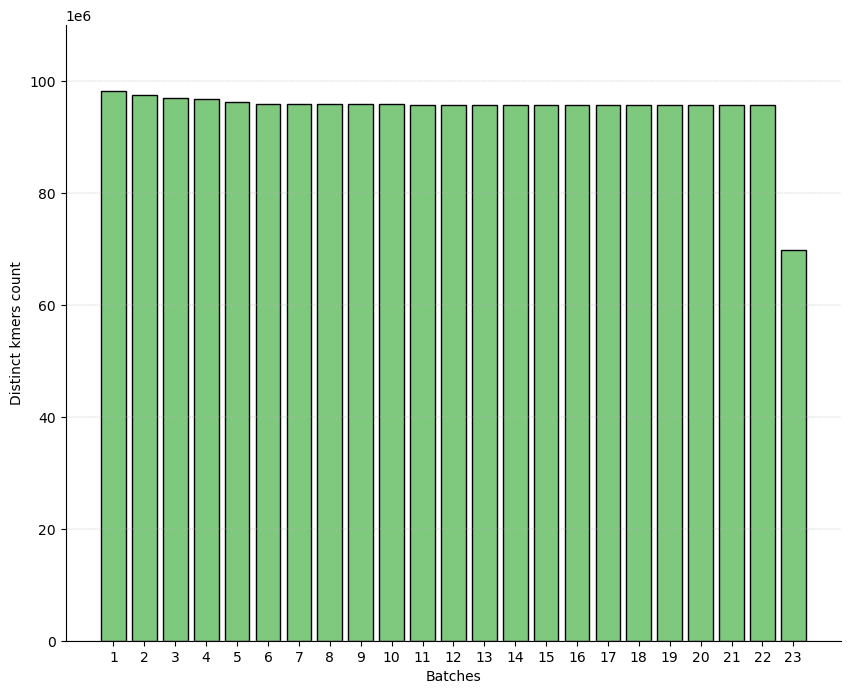

In [276]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
x = list(df_card.index)
x = list(range(1, 24))
data= list(df_card['cardinality'])
bar_1 = ax.bar(x, data, edgecolor =  'black', width = 0.8)
#ax.bar_label(bar_1, labels = [f'{round(v/1000000000,3)} GB' for v in data], fontsize = 10,padding = 2)
ax.set_xticks(x, x)
ax.set_ylim(0,110000000)

plt.xlabel("Batches")
plt.ylabel("Distinct kmers count")
#plt.title("Compression sizes")
ax.ticklabel_format(axis = 'y',scilimits = (6,6))
plt.grid(True,linestyle='--', linewidth=0.3, axis='y')
plt.show